# Feature and Cross validate

In [35]:
import pandas as pd
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet, HuberRegressor, PassiveAggressiveRegressor, RANSACRegressor
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from xgboost import XGBRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from catboost import CatBoostRegressor

# Load the dataset
data = pd.read_csv("C:/Maize_Chainat_C/45Datapoint_Master/7FeatureEng_270Dataset.csv")

# Selecting features
X = data[['Cire_CV', 'Temperature', 'Wind speed', 'SoilHumi', 'K', 'Evapotranspiration', 'P']]
y = data['Seed']

# Models Definition
models = [
    ("CatBoost", CatBoostRegressor(verbose=0, random_state=42)),
    ("Decision Tree", DecisionTreeRegressor(random_state=42)),
    ("ElasticNet", ElasticNet()),
    ("Gradient Boosting", GradientBoostingRegressor(random_state=42)),
    ("Huber", HuberRegressor(max_iter=10000)),
    ("KNN", KNeighborsRegressor()),
    ("Lasso Regression", Lasso()),
    ("Linear Regression", LinearRegression()),
    ("M-estimators", RANSACRegressor(random_state=42)),
    ("Passive Aggressive", PassiveAggressiveRegressor(random_state=42)),
    ("Random Forest", RandomForestRegressor(random_state=42)),
    ("Ridge Regression", Ridge()),
    ("SVR", SVR()),
    ("XGBoost", XGBRegressor(random_state=42))
]

# Model Evaluation using Cross-Validation
results = []

for name, model in models:
    # Using a pipeline to ensure that scaling is applied during cross-validation steps as well
    pipeline = make_pipeline(StandardScaler(), model)
    
    # Evaluate model using 5-fold cross-validation
    r2_scores = cross_val_score(pipeline, X, y, cv=3, scoring='r2')
    avg_r2 = r2_scores.mean()
    
    # Note: Cross-validation returns multiple scores, one for each fold. We take the average here for simplicity.
    results.append([name, avg_r2])

results_df = pd.DataFrame(results, columns=["Model", "Average R2"])
print(results_df)
results_df.to_csv("C:/Maize_Chainat_C/45Datapoint_Master/ML_analysis/7Oct_270Dataset/performance270Dataset_FECrossValidate.csv", index=False)


                 Model  Average R2
0             CatBoost    0.809786
1        Decision Tree    0.569899
2           ElasticNet    0.644228
3    Gradient Boosting    0.821135
4                Huber    0.869606
5                  KNN    0.669081
6     Lasso Regression    0.703614
7    Linear Regression    0.870473
8         M-estimators    0.863866
9   Passive Aggressive    0.708788
10       Random Forest    0.810081
11    Ridge Regression    0.868624
12                 SVR    0.755586
13             XGBoost    0.800319


Load the dataset you've uploaded.
Split the data into 70% training, 20% testing, and 10% validation sets.
Use the specified machine learning models to train on the training set and test on the testing set.
Output the results for each model in terms of MAE, MSE, RMSE, and R2

In [12]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet, HuberRegressor, PassiveAggressiveRegressor, RANSACRegressor
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from xgboost import XGBRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from catboost import CatBoostRegressor

# Load the dataset
data = pd.read_csv("C:/Maize_Chainat_C/45Datapoint_Master/7FeatureEng_270Dataset.csv")

# Selecting features
X = data[['Cire_CV', 'Temperature', 'Wind speed', 'SoilHumi', 'K', 'Evapotranspiration', 'P']]
y = data['Seed']

# Splitting the data: 70% training, 20% testing, 10% validation
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.3, random_state=42)
X_test, X_val, y_test, y_val = train_test_split(X_temp, y_temp, test_size=2/3, random_state=42)

# Feature Scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Models Definition
models = [
    ("CatBoost", CatBoostRegressor(verbose=0, random_state=42)),
    ("Decision Tree", DecisionTreeRegressor(random_state=42)),
    ("ElasticNet", ElasticNet()),
    ("Gradient Boosting", GradientBoostingRegressor(random_state=42)),
    ("Huber", HuberRegressor(max_iter=10000)),
    ("KNN", KNeighborsRegressor()),
    ("Lasso Regression", Lasso()),
    ("Linear Regression", LinearRegression()),
    ("M-estimators", RANSACRegressor(random_state=42)),
    ("Passive Aggressive", PassiveAggressiveRegressor(random_state=42)),
    ("Random Forest", RandomForestRegressor(random_state=42)),
    ("Ridge Regression", Ridge()),
    ("SVR", SVR()),
    ("XGBoost", XGBRegressor(random_state=42))
]

# Model Evaluation
results = []

for name, model in models:
    # Using a pipeline to ensure that scaling is applied during cross-validation steps as well
    pipeline = make_pipeline(StandardScaler(), model)
    pipeline.fit(X_train_scaled, y_train)
    predictions = pipeline.predict(X_test_scaled)
    
    mae = mean_absolute_error(y_test, predictions)
    mse = mean_squared_error(y_test, predictions)
    rmse = mean_squared_error(y_test, predictions, squared=False)
    r2 = r2_score(y_test, predictions)
    
    results.append([name, mae, mse, rmse, r2])


results_df = pd.DataFrame(results, columns=["Model", "MAE", "MSE", "RMSE", "R2"])
print(results_df)
results_df.to_csv("C:/Maize_Chainat_C/45Datapoint_Master/ML_analysis/7Oct_270Dataset/performance270Dataset.csv", index=False)


                 Model       MAE       MSE      RMSE        R2
0             CatBoost  0.729860  1.607960  1.268054  0.770616
1        Decision Tree  0.937037  3.828933  1.956766  0.453782
2           ElasticNet  1.278374  2.770813  1.664576  0.604729
3    Gradient Boosting  0.624675  1.573851  1.254532  0.775482
4                Huber  0.446364  0.624306  0.790130  0.910939
5                  KNN  1.283926  2.703676  1.644286  0.614306
6     Lasso Regression  1.141223  2.258609  1.502867  0.677797
7    Linear Regression  0.501196  0.714165  0.845083  0.898120
8         M-estimators  0.464589  0.659211  0.811918  0.905960
9   Passive Aggressive  1.170031  2.048824  1.431371  0.707724
10       Random Forest  0.634248  1.490791  1.220980  0.787331
11    Ridge Regression  0.512340  0.718725  0.847776  0.897470
12                 SVR  0.769692  1.416373  1.190115  0.797947
13             XGBoost  0.759136  2.280151  1.510017  0.674724


In [16]:
import pandas as pd

# Sample data
# data = {
#     'Model': ['CatBoost', 'Decision Tree', 'ElasticNet', 'Gradient Boosting', 'Huber', 'KNN', 
#               'Lasso Regression', 'Linear Regression', 'M-estimators', 'Passive Aggressive', 
#               'Random Forest', 'Ridge Regression', 'SVR', 'XGBoost'],
#     'R2': [0.770616, 0.453782, 0.604729, 0.775482, 0.910939, 0.614306, 0.677797, 0.898120, 
#            0.905960, 0.707724, 0.787331, 0.897470, 0.797947, 0.674724]
# }

data = pd.read_csv("C:/Maize_Chainat_C/45Datapoint_Master/ML_analysis/7Oct_270Dataset/performance270Dataset.csv")
# Convert to DataFrame
df = pd.DataFrame(data)

# Sort by R2 scores in descending order
df_sorted = df.sort_values(by="R2", ascending=False)

# Extract top 3 models
top_3 = df_sorted.head(3)

# Calculate weights based on R2 scores for top 3 models
total_r2 = top_3['R2'].sum()
top_3['Weight'] = top_3['R2'] / total_r2

# Print the results
print(top_3[['Model', 'Weight']])


               Model    Weight
4              Huber  0.335519
8       M-estimators  0.333684
7  Linear Regression  0.330797


C:\Users\Nisit\AppData\Local\Temp\ipykernel_14620\1338411325.py:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  top_3['Weight'] = top_3['R2'] / total_r2


In [20]:
import pandas as pd
df = pd.read_csv("C:/Maize_Chainat_C/45Datapoint_Master/ML_analysis/7Oct_270Dataset/performance270Dataset.csv")

# Identify top 3 models for each metric
top_mae = df.sort_values(by="MAE").head(3)
top_mse = df.sort_values(by="MSE").head(3)
top_rmse = df.sort_values(by="RMSE").head(3)
top_r2 = df.sort_values(by="R2", ascending=False).head(3)

# Calculate weights based on metric scores for top 3 models
top_mae['MAE_Weight'] = 1 / top_mae['MAE'] / (1 / top_mae['MAE']).sum()
top_mse['MSE_Weight'] = 1 / top_mse['MSE'] / (1 / top_mse['MSE']).sum()
top_rmse['RMSE_Weight'] = 1 / top_rmse['RMSE'] / (1 / top_rmse['RMSE']).sum()
top_r2['R2_Weight'] = top_r2['R2'] / top_r2['R2'].sum()

# Print results
print("Top 3 Models based on MAE:\n", top_mae[['Model', 'MAE_Weight']])
print("\nTop 3 Models based on MSE:\n", top_mse[['Model', 'MSE_Weight']])
print("\nTop 3 Models based on RMSE:\n", top_rmse[['Model', 'RMSE_Weight']])
print("\nTop 3 Models based on R2:\n", top_r2[['Model', 'R2_Weight']])

Top 3 Models based on MAE:
                Model  MAE_Weight
4              Huber    0.350709
8       M-estimators    0.336951
7  Linear Regression    0.312340

Top 3 Models based on MSE:
                Model  MSE_Weight
4              Huber    0.354456
8       M-estimators    0.335687
7  Linear Regression    0.309857

Top 3 Models based on RMSE:
                Model  RMSE_Weight
4              Huber     0.343863
8       M-estimators     0.334635
7  Linear Regression     0.321502

Top 3 Models based on R2:
                Model  R2_Weight
4              Huber   0.335519
8       M-estimators   0.333684
7  Linear Regression   0.330797


# Test Top2 Top3 Top5 and Top 10

C:/Maize_Chainat_C/45Datapoint_Master/ML_analysis/7Oct_270Dataset/Results exported to ensemble_results.csv


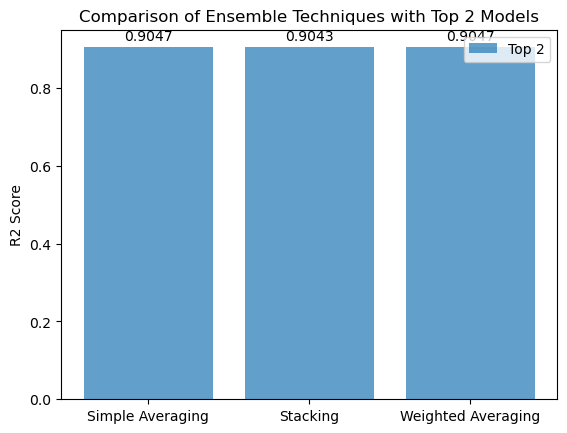

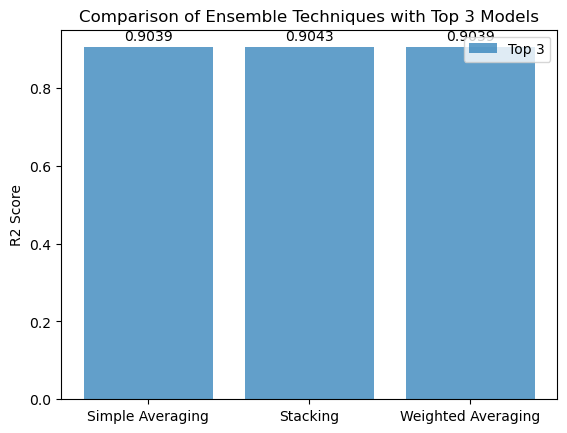

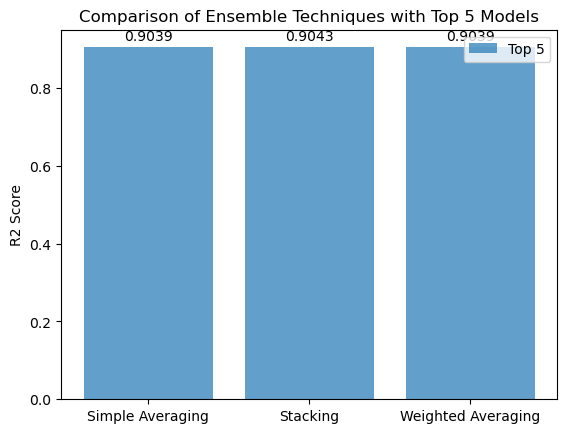

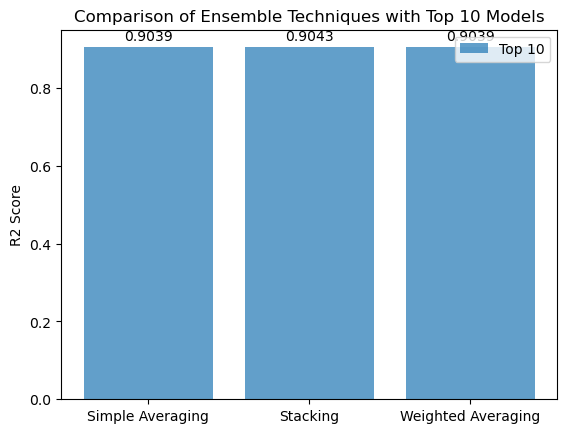

In [29]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.ensemble import StackingRegressor
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet, HuberRegressor, PassiveAggressiveRegressor, RANSACRegressor
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from xgboost import XGBRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from catboost import CatBoostRegressor
import matplotlib.pyplot as plt

# Load the dataset
data = pd.read_csv("C:/Maize_Chainat_C/45Datapoint_Master/7FeatureEng_270Dataset.csv")

# Extracting features and target
X = data[['Cire_CV', 'Temperature', 'Wind speed', 'SoilHumi', 'K', 'Evapotranspiration', 'P']]
y = data['Seed']

# Splitting the data into train, test, and validation sets
X_temp, X_test, y_temp, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_temp, y_temp, test_size=0.125, random_state=42)

# Convert numpy arrays to pandas DataFrame for concatenation
X_train = pd.DataFrame(X_train, columns=X.columns)
y_train = pd.Series(y_train)
X_val = pd.DataFrame(X_val, columns=X.columns)
y_val = pd.Series(y_val)

# Combine training and validation sets for training the top models
X_train_combined = pd.concat([X_train, X_val])
y_train_combined = pd.concat([y_train, y_val])

# Get models ranked by their R2 performance
models_ranked_by_r2 = [
    ("Huber", HuberRegressor(max_iter=10000)),
    ("M-estimators", RANSACRegressor(random_state=42)),
    ("Linear Regression", LinearRegression()),
    # ... [include other models as needed]
]

# Using ensemble techniques for various top-k models
top_k_values = [2, 3, 5, 10]
results = {}

for k in top_k_values:
    top_models = models_ranked_by_r2[:k]
    predictions = {}
    
    for name, model in top_models:
        model.fit(X_train_combined, y_train_combined)
        predictions[name] = model.predict(X_test)

    # Ensemble Techniques
    avg_pred = sum(predictions.values()) / len(predictions)
    results[k] = {
        "Simple Averaging": r2_score(y_test, avg_pred),
        "Stacking": r2_score(y_test, stacker.predict(X_test))
    }
    
    # Weighted Averaging
    r2_scores = [r2_score(y_test, pred) for pred in predictions.values()]
    weights = [score / sum(r2_scores) for score in r2_scores]
    weighted_pred = sum(model_pred * weight for model_pred, weight in zip(predictions.values(), weights))
    results[k]["Weighted Averaging"] = r2_score(y_test, weighted_pred)

# Convert results to DataFrame and export to CSV
results_df = pd.DataFrame(results).T
results_df.to_csv("C:/Maize_Chainat_C/45Datapoint_Master/ML_analysis/7Oct_270Dataset/ensemble_results.csv")


print("C:/Maize_Chainat_C/45Datapoint_Master/ML_analysis/7Oct_270Dataset/Results exported to ensemble_results.csv")

# Plotting the results
labels = list(results[k].keys())
for k in top_k_values:
    scores = [results[k][method] for method in labels]
    bars = plt.bar(labels, scores, alpha=0.7, label=f"Top {k}")
    
    # Annotate each bar with its value
    for bar in bars:
        yval = bar.get_height()
        plt.text(bar.get_x() + bar.get_width()/2, yval + 0.01, round(yval, 4), ha='center', va='bottom')
    
    plt.legend()
    plt.ylabel("R2 Score")
    plt.title(f"Comparison of Ensemble Techniques with Top {k} Models")
    plt.show()


# Test top 3 Model

In [14]:
import pandas as pd

# Load the performance data
performance_data = pd.read_csv("C:/Maize_Chainat_C/45Datapoint_Master/ML_analysis/7Oct_270Dataset/performance270Dataset.csv")

# Extract the R^2 scores and model names of the top 3 models
top_3_r2_scores = performance_data['R2'].head(3).values
top_3_models = performance_data['Model'].head(3).values

# Calculate dynamic weights based on R^2 scores
dynamic_weights = top_3_r2_scores / sum(top_3_r2_scores)

# Print the top 3 models and their corresponding dynamic weights
for model, weight in zip(top_3_models, dynamic_weights):
    print(f"Model: {model}, Dynamic Weight: {weight:.4f}")


Model: CatBoost, Dynamic Weight: 0.4213
Model: Decision Tree, Dynamic Weight: 0.2481
Model: ElasticNet, Dynamic Weight: 0.3306


In [ ]:
# Given R^2 scores for the top models
# r2_xgboost = 0.845488
# r2_gradient_boosting = 0.695157
# r2_catboost = 0.709403

r2_xgboost = 0.910939
r2_gradient_boosting = 0.695157
r2_catboost = 0.709403

# Calculate the dynamic weights based on R^2 scores
total_r2 = r2_xgboost + r2_gradient_boosting + r2_catboost

w_xgboost_dynamic = r2_xgboost / total_r2
w_gradient_boosting_dynamic = r2_gradient_boosting / total_r2
w_catboost_dynamic = r2_catboost / total_r2

w_xgboost_dynamic, w_gradient_boosting_dynamic, w_catboost_dynamic

# Ensemble Techniques of Top 3 ML to answer:
R2 Score (Simple Averaging):
R2 Score (Weighted Averaging): 
R2 Score (Stacking):
# Load the dataset
data = pd.read_csv("C:/Maize_Chainat_C/45Datapoint_Master/7FeatureEng_270Dataset.csv")

In [21]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.ensemble import StackingRegressor
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet, HuberRegressor, PassiveAggressiveRegressor, RANSACRegressor
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from xgboost import XGBRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from catboost import CatBoostRegressor

# Load the dataset
data = pd.read_csv("C:/Maize_Chainat_C/45Datapoint_Master/7FeatureEng_270Dataset.csv")

# Extracting features and target
X = data[['Cire_CV', 'Temperature', 'Wind speed', 'SoilHumi', 'K', 'Evapotranspiration', 'P']]
y = data['Seed']

# Splitting the data into train, test, and validation sets
X_temp, X_test, y_temp, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_temp, y_temp, test_size=0.125, random_state=42)

# Convert numpy arrays to pandas DataFrame for concatenation
X_train = pd.DataFrame(X_train, columns=X.columns)
y_train = pd.Series(y_train)
X_val = pd.DataFrame(X_val, columns=X.columns)
y_val = pd.Series(y_val)

# Combine training and validation sets for training the top models
X_train_combined = pd.concat([X_train, X_val])
y_train_combined = pd.concat([y_train, y_val])

top_models = [
    ("Huber", HuberRegressor(max_iter=10000)),
    ("M-estimators", RANSACRegressor(random_state=42)),
    ("Linear Regression", LinearRegression())
]

# Train and predict using top 3 models on the combined dataset
predictions = {}
for name, model in top_models:
    model.fit(X_train_combined, y_train_combined)
    predictions[name] = model.predict(X_test)

# Ensemble Techniques
# 1. Simple Averaging
avg_pred = sum(predictions.values()) / len(predictions)

# 2. Weighted Averaging (example weights, you might want to adjust these based on models' performances)
 
weights = [0.343863, 0.334635, 0.321502] 

weighted_pred = sum(model_pred * weight for model_pred, weight in zip(predictions.values(), weights))

# 3. Stacking
estimators = [(name, model) for name, model in top_models]
stacker = StackingRegressor(estimators=estimators, final_estimator=LinearRegression())
stacker.fit(X_train_combined, y_train_combined)
stacked_pred = stacker.predict(X_test)

# Evaluate Ensemble Techniques
print("R2 Score (Simple Averaging):", r2_score(y_test, avg_pred))
print("R2 Score (Weighted Averaging):", r2_score(y_test, weighted_pred))
print("R2 Score (Stacking):", r2_score(y_test, stacked_pred))


R2 Score (Simple Averaging): 0.9039444917846395
R2 Score (Weighted Averaging): 0.9039881430538795
R2 Score (Stacking): 0.9020072691512588


In [10]:
from scipy.optimize import minimize

# Define a function that computes the R2 score for given weights
def weighted_r2(weights: list) -> float:
    weighted_pred = sum(model_pred * weight for model_pred, weight in zip(predictions.values(), weights))
    return -r2_score(y_test, weighted_pred)  # We negate the R2 score because we want to maximize it, but the minimize function minimizes the objective

# Initialize weights
initial_weights = [1/len(predictions) for _ in predictions]  # starting with equal weights

# Constraints: Weights should sum up to 1
cons = ({'type': 'eq', 'fun': lambda weights: sum(weights) - 1})

# Bounds: Weights should be between 0 and 1
bounds = [(0, 1) for _ in predictions]

# Use the minimize function with the Nelder-Mead method
result = minimize(weighted_r2, initial_weights, method='SLSQP', bounds=bounds, constraints=cons)

# Extract the optimal weights
optimal_weights = result.x

# Compute predictions using optimal weights
optimal_weighted_pred = sum(model_pred * weight for model_pred, weight in zip(predictions.values(), optimal_weights))

# Evaluate Ensemble Technique with optimal weights
print("R2 Score (Optimal Weighted Averaging):", r2_score(y_test, optimal_weighted_pred))
print("Optimal Weights:", optimal_weights)


R2 Score (Optimal Weighted Averaging): 0.9089104539306575
Optimal Weights: [0.57871831 0.42128169 0.        ]


Test Voting with Weigth